<a href="https://colab.research.google.com/github/RodrigoEslava/Ms_project/blob/main/LBB_ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LBB 4 aprendizado de maquina**







Era uma vez, em uma densa floresta no Pantanal Mato-Grossense, dois grupos de tamanduás - o tamanduá-bandeira (Myrmecophaga tridactyla) e o tamanduá-mirim (Tamandua tetradactyla). Esses dois grupos tinham características físicas e genéticas distintas que os diferenciavam.

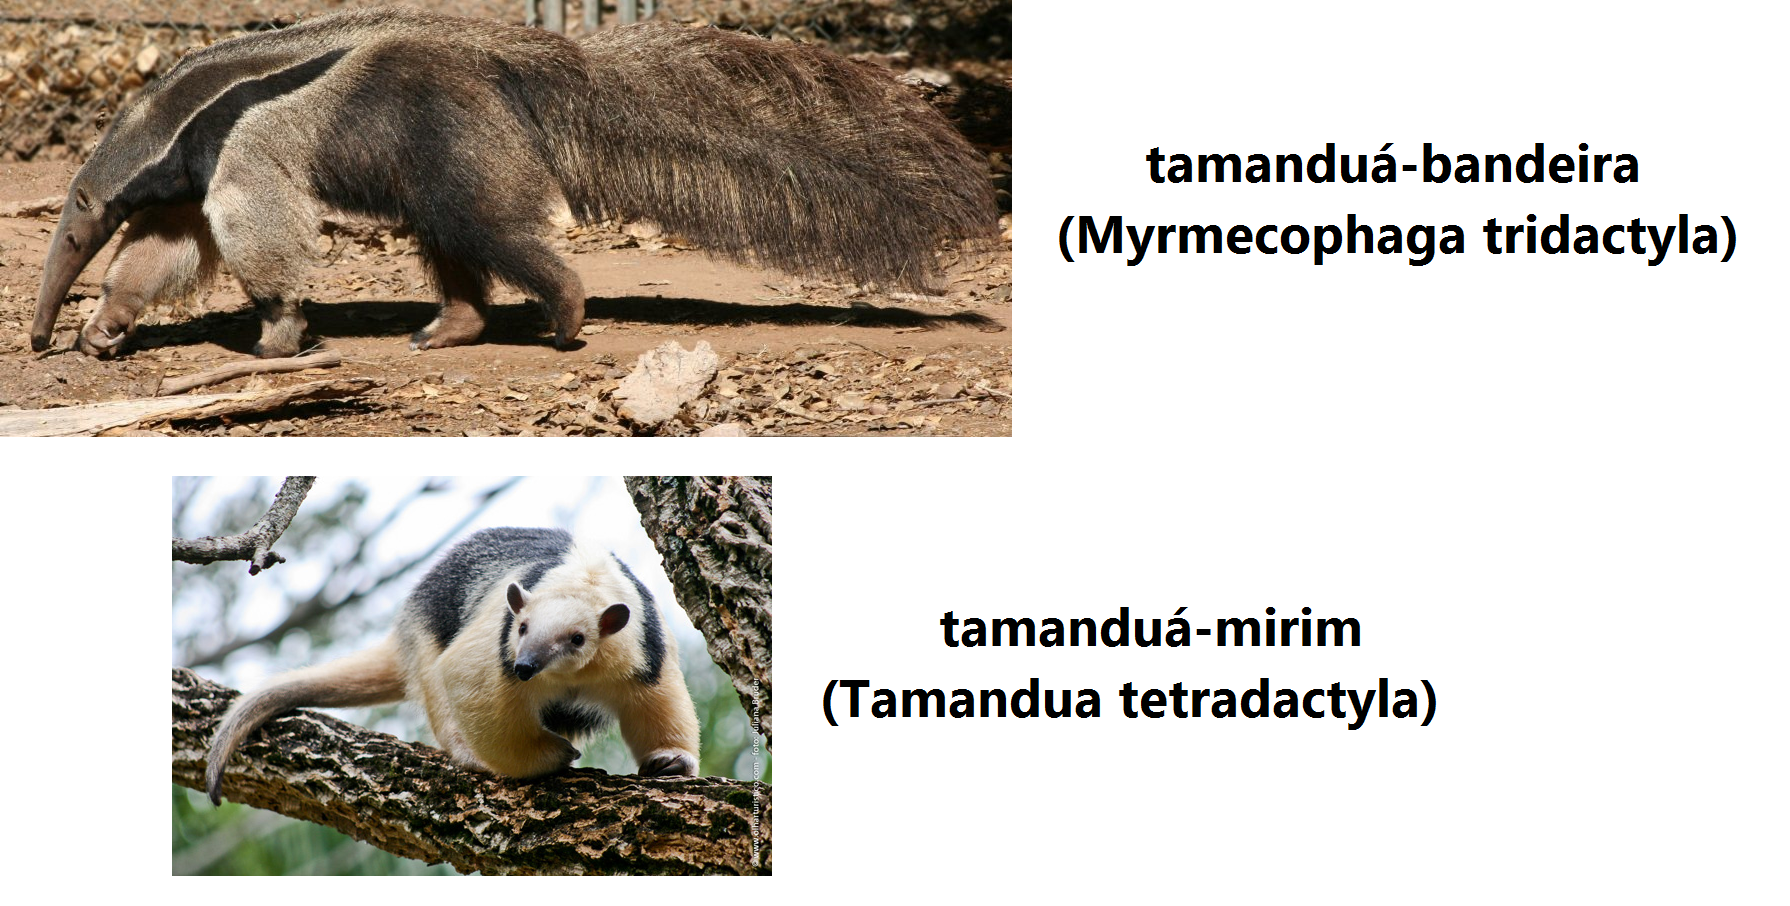

Fonte: Dave Pape [Public domain], via Wikimedia Commons, e UFSC.

Um dia, um grupo de pesquisadores da organização local de conservação da vida selvagem decidiu realizar uma análise de agrupamento (clustering) para entender melhor a estrutura populacional desses dois grupos de tamanduás. Eles colocaram um formigueiro no meio de um local aberto, e esperaram pela batalha mais épica do Pantanal acontecer: a disputa por comida entre os tamanduás da região. Eles coletaram dados de localização dos chips de cada tamanduá levando em conta as coordenadas do terreno.

Depois de preparar os dados, os pesquisadores aplicaram o algoritmo de agrupamento k-means para agrupar os tamanduás  em grupos distintos com base em sua semelhança nessa batalha. Eles começaram com um palpite inicial de dois grupos, correspondendo aos dois grupos de tamanduás. No entanto, eles descobriram que os clusters resultantes não estavam muito bem separados. Seu objetivo aqui é ajudá-los a melhorar o agrupamento dos tamanduás.

Será fornecido para você três datasets:

Dataset de treino (train.csv) - Contém três colunas, sendo as duas primeiras as coordenadas geográficas e a terceira indicando a espécie de tamanduá (label: 0 ou 1).
Dataset de teste (test.csv) - Contém três colunas, sendo as duas primeiras as coordenadas geográficas e a terceira indicando a espécie de tamanduá (label: 0 ou 1).
Dataset de validação (validacao.csv) - Contém duas colunas contendo as coordenadas geográficas.
Você deverá fornecer a espécie de tamanduá correta para o dataset de validação, tendo como outputs os labels 0 ou 1 (não 0.0 ou 1.0).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.cluster import KMeans

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics


import lightgbm as lgb
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')
#Leitura dos datasets
train_df = pd.read_csv('train_clustering.csv')
test_df = pd.read_csv('test_clustering.csv')
valid_df = pd.read_csv('validacao_clustering.csv')



In [ ]:

# Calcular os valores de referência para as colunas x e y
mean_x = train_df['4.41933'].mean()
mean_y = train_df['-4.36495'].mean()

std_x = train_df['4.41933'].std()
std_y = train_df['-4.36495'].std()

# Definir o critério de exclusão baseado nos valores de referência
threshold_x = mean_x + 2*std_x
threshold_y = mean_y + 2*std_y

# Identificar os outliers no dataframe
train_df['outlier'] = ((train_df['4.41933'] > threshold_x) | (train_df['-4.36495'] > threshold_y))

# Remover os outliers do dataframe
train_df = train_df.loc[~train_df['outlier']]

# Exibir o resultado
train_df = train_df.drop(["outlier"], axis=1)
train_df


,4.41933,-4.36495,0.0
0,6.070196,1.488915,0.0
1,2.007118,-7.977385,0.0
2,-0.293764,-3.819495,1.0
3,-2.550041,-0.001893,1.0
4,-5.998590,3.345475,0.0
...,...,...,...
17490,-3.185513,-0.285337,1.0
17491,-1.876277,1.174661,1.0
17493,-1.449859,0.357157,1.0
17494,3.125019,-4.056496,1.0


In [ ]:
#Separação das features e labels dos datasets de treino e teste
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

In [ ]:
train_df

,4.41933,-4.36495,0.0
0,6.070196,1.488915,0.0
1,2.007118,-7.977385,0.0
2,-0.293764,-3.819495,1.0
3,-2.550041,-0.001893,1.0
4,-5.998590,3.345475,0.0
...,...,...,...
17490,-3.185513,-0.285337,1.0
17491,-1.876277,1.174661,1.0
17493,-1.449859,0.357157,1.0
17494,3.125019,-4.056496,1.0


In [ ]:
#defining values to folds

num_folds = 10
seed = 7
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)


#scoring methods

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }

#Define os parâmetros do modelo
params = {
'boosting_type': 'gbdt',
'objective': 'binary',
'metric': 'binary_logloss',
'num_leaves': 100,
'learning_rate': 0.06,
'feature_fraction': 0.9
}

#Treinando o modelo de LightGBM com os parâmetros definidos
#Classifier multiples evaluation metrics

#Classifier test multiples evaluation metricas

#lgbm = lgb.LGBMClassifier(boosting_type ='gbdt', num_boost_round=10, max_bin= 50, max_depth= 10, num_leaves= 100, learning_rate= .9, objective = "binary", boost_from_average = True, feature_fraction =  .01)
lgbm = lgb.LGBMClassifier()
cv_results = cross_validate(lgbm, X_train, y_train, cv = kf, scoring=custom_scorer)


print(f"Resultados do CV: {cv_results}")

# Print the results
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 Score: ", cv_results['test_f1'].mean())
print("ROC AUC: ", cv_results['test_roc_auc'].mean())
print("Accuracy: ", cv_results['test_accuracy'].mean())




Resultados do CV: {'fit_time': array([0.14100862, 0.12269568, 0.13427639, 0.14335632, 0.15145779]), 'score_time': array([0.03128481, 0.0332303 , 0.03024721, 0.05270481, 0.03498697]), 'test_accuracy': array([0.94663089, 0.95378652, 0.94424568, 0.94424568, 0.94065016]), 'test_precision': array([0.93911962, 0.95068975, 0.93621528, 0.93740852, 0.93719565]), 'test_recall': array([0.92702813, 0.93630005, 0.92268223, 0.92134345, 0.91667828]), 'test_f1': array([0.93281397, 0.94310966, 0.92912949, 0.92892994, 0.92614385]), 'test_roc_auc': array([0.92702813, 0.93630005, 0.92268223, 0.92134345, 0.91667828])}
Precision:  0.9401257618012846
Recall:  0.9248064278721408
F1 Score:  0.9320253813939587
ROC AUC:  0.9248064278721408
Accuracy:  0.9459117859370323


In [ ]:
lgbm.fit(X_train, y_train)

#Predição dos clusters dos tamanduás no dataset de teste
#test_preds = lgbm.predict(X_test)


# Predict test
predict_class_test = lgbm.predict(X_test)
print(f"predict_class_test: {predict_class_test}")
predict_class_test = pd.DataFrame(data=predict_class_test)


predict_class_prob_test = lgbm.predict_proba(X_test)
print(f"predict_class_prob_test: {predict_class_prob_test}")
predict_class_prob_test = pd.DataFrame(data=predict_class_prob_test)


# Score list

f1_score_m = f1_score(y_test, predict_class_test, average='macro')
roc_auc_m = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1], average='macro')


print(f"f1 : {f1_score_m}, roc: {roc_auc_m}")

predict_class_test: [0. 0. 0. ... 1. 1. 1.]
predict_class_prob_test: [[9.82092483e-01 1.79075165e-02]
 [9.99456046e-01 5.43954402e-04]
 [6.66521062e-01 3.33478938e-01]
 ...
 [9.35980110e-04 9.99064020e-01]
 [2.87524480e-03 9.97124755e-01]
 [2.49190192e-03 9.97508098e-01]]
f1 : 0.9369793866313383, roc: 0.9888272958242456


In [ ]:
#Predição dos clusters dos tamanduás no dataset de validação
valid_coords = valid_df.values
valid_preds = lgbm.predict(valid_coords)

#Convertendo as predições em classes inteiras (0 ou 1)
valid_preds = np.round(valid_preds).astype(int)

#Print dos labels dos tamanduás no dataset de validação
print(valid_preds)

valid_preds = pd.DataFrame(valid_preds)
valid_preds.to_csv("predict_class_validacao35.csv", index=None)

[1 0 1 ... 0 1 1]


In [ ]:
len(X_train)

17496

In [ ]:
len(valid_preds)

2474

# xgb

In [ ]:

#Define os parâmetros do modelo
params = {
'boosting_type': 'gbdt',
'objective': 'binary',
'metric': 'binary_logloss',
'num_leaves': 100,
'learning_rate': 0.06,
'feature_fraction': 0.9
}

#Treinando o modelo de LightGBM com os parâmetros definidos
#Classifier multiples evaluation metrics

#Classifier test multiples evaluation metricas


xgb = xgb.XGBClassifier()
cv_results = cross_validate(xgb, X_train, y_train, cv = kf, scoring=custom_scorer)


print(f"Resultados do CV: {cv_results}")

# Print the results
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 Score: ", cv_results['test_f1'].mean())
print("ROC AUC: ", cv_results['test_roc_auc'].mean())
print("Accuracy: ", cv_results['test_accuracy'].mean())


Resultados do CV: {'fit_time': array([3.42778182, 2.81456923, 2.81698418, 4.59596157, 2.7620132 ]), 'score_time': array([0.03948784, 0.03885674, 0.03899455, 0.04795766, 0.04494309]), 'test_accuracy': array([0.94314286, 0.94712775, 0.9436982 , 0.95141469, 0.94655616]), 'test_precision': array([0.94130993, 0.93938591, 0.94104741, 0.94811492, 0.943534  ]), 'test_recall': array([0.9245893 , 0.93487162, 0.92868019, 0.9379205 , 0.93149039]), 'test_f1': array([0.93233133, 0.93708423, 0.93448722, 0.94278346, 0.93717649]), 'test_roc_auc': array([0.9245893 , 0.93487162, 0.92868019, 0.9379205 , 0.93149039])}
Precision:  0.9426784337106341
Recall:  0.9315104002400014
F1 Score:  0.9367725457752286
ROC AUC:  0.9315104002400014
Accuracy:  0.9463879312456621


In [ ]:
xgb.fit(X_train, y_train)

#Predição dos clusters dos tamanduás no dataset de teste
#test_preds = lgbm.predict(X_test)


# Predict test
predict_class_test = xgb.predict(X_test)
print(f"predict_class_test: {predict_class_test}")
predict_class_test = pd.DataFrame(data=predict_class_test)


predict_class_prob_test = xgb.predict_proba(X_test)
print(f"predict_class_prob_test: {predict_class_prob_test}")
predict_class_prob_test = pd.DataFrame(data=predict_class_prob_test)


# Score list

f1_score_m = f1_score(y_test, predict_class_test, average='macro')
roc_auc_m = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1], average='macro')


print(f"f1 : {f1_score_m}, roc: {roc_auc_m}")

predict_class_test: [0 0 0 ... 1 1 1]
predict_class_prob_test: [[9.9006736e-01 9.9326298e-03]
 [9.9923515e-01 7.6485920e-04]
 [5.5673766e-01 4.4326237e-01]
 ...
 [3.6585331e-04 9.9963415e-01]
 [1.9287467e-03 9.9807125e-01]
 [2.0372868e-03 9.9796271e-01]]
f1 : 0.9393147655376293, roc: 0.9888707412674659


In [ ]:
#Predição dos clusters dos tamanduás no dataset de validação
valid_coords = valid_df.values
valid_preds = xgb.predict(valid_coords)

#Convertendo as predições em classes inteiras (0 ou 1)
valid_preds = np.round(valid_preds).astype(int)

#Print dos labels dos tamanduás no dataset de validação
print(valid_preds)

valid_preds = pd.DataFrame(valid_preds)
valid_preds.to_csv("predict_class_validacao45.csv", index=None)

[1 0 1 ... 0 1 1]
